# Исследование надежности заемщиков


**Описание проекта**

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на _факт погашения кредита_ в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**План работы:**
1. [Обзор данных](#section_1),
2. [Предобработка данных](#section_2),
3. [Исследование данных](#section_3),
4. [Итоги исследования](#section_4).

<a id='section_1'></a>
## Обзор данных

Импорт библиотек `pandas` и `seaborn`.

In [ ]:
import pandas as pd
import seaborn as sns

Чтение датасета `data.csv`

In [ ]:
try:
    data = pd.read_csv('/datasets/data.csv') # локальная версия
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv') # удалённая версия

Вывод первые 20 строчек датафрейма `data` на экран.

In [ ]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Описание данных:**
- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

Вывод основной информации о датафрейме.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


<a id='section_2'></a>
## Предобработка данных

### Удаление пропусков

Вывод количества пропущенных значений для каждого столбца.

In [ ]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения.
- `days_employed` Пропуски в этом столбце будут обработаны на следующем этапе.
- `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить _пропуски_ в этом столбце нужно медианным значением по каждому типу из столбца `income_type`.

_Например_, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

В данных могут встречаться _артефакты_ (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработаю значения в этом столбце: заменив все отрицательные значения положительными с помощью метода `abs()`.

In [ ]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведу медианное значение трудового стажа `days_employed` в днях.

In [ ]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (_безработные_ и _пенсионеры_) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставлю их в исходном виде.

Вывод переченя уникальных значений столбца `children`.

In [ ]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце `children` есть два аномальных значения. Удалю строки, в которых встречаются такие аномальные значения.

In [ ]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Контроль. Ещё раз выведу перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.

In [ ]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

Заполню пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.

In [ ]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Проконтролирую, что все пропуски заполнены. Проверю себя и ещё раз выведите количество пропущенных значений для каждого столбца.

In [ ]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

Замена вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.

In [ ]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

Обработака неявных дубликатов в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведу их к нижнему регистру.

In [ ]:
data['education'] = data['education'].str.lower()

Вывод на экран количество строк-дубликатов в данных. Если таковыприсутствуют - удалю их.

In [ ]:
data.duplicated().sum()

71

In [ ]:
data = data.drop_duplicates()

### Категоризация данных

На основании диапазонов, указанных ниже, создам в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

_Например_, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Использую собственную функцию `categorize_income()` и метод `apply()`.

In [ ]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [ ]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Вывод на экран перечень уникальных целей взятия кредита из столбца `purpose`.

In [ ]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создам функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

_Например_, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.

In [ ]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [ ]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
display(data)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем


<a id='section_3'></a>
## Исследование данных

### Зависимость между количеством детей и возвратом кредита в срок.

**Задача:** сгруппировать заёмщиков по количеству детей, и подсчитать процентное соотношение кредитов выплаченных в срок и с опозданием. Исходные данные берутся из датафрейма `data`, прошедший предобработку (убраны пропуски, удалены дубликаты).

**Результат:** сводная таблица `debt_from_children`, содержащая 5 столбцов:
- `children` - количество детей у заёмщиков
- `sum` - количество кредитов не оплаченных в срок
- `count` - общее количетсов кредитов
- `late` - доля кредитов выплаченная с опозданием
- `on_time` - доля кредитов выплаченных во время

Значения в столбцах `late` и `on_time` указаны в процентах (%).

In [ ]:
debt_from_children = data.groupby('children').agg({'debt':['sum','count']})
debt_from_children['late'] = debt_from_children['debt']['sum'] / debt_from_children['debt']['count'] * 100
debt_from_children['on_time'] = 100 - debt_from_children['late']

display(debt_from_children)

debt             late     on_time
           sum  count                      
children                                   
0         1063  14091  7.543822   92.456178
1          444   4808  9.234609   90.765391
2          194   2052  9.454191   90.545809
3           27    330  8.181818   91.818182
4            4     41  9.756098   90.243902
5            0      9  0.000000  100.000000

**Вывод:** Зависимость есть!

Вероятность возврата кредита в срок, в первую очередь зависит от **наличия** детей, а во вторую от конкретного **количества**.

Меньше всего просроченных кредитов среди заёмщиков без детей.

У заёмщиков с детьми, вероятность имеет почти одинаковые значения. Среди них выделяется группа с 3мя детьми, у которой вероятность срыва кредитного срока - меньше остальных. Возможно причиной этому различные льготы, которые полагаются многодетным семьям. Этот статут семья получает как раз при наличии минимум 3х детей.

Группа заёмщиков, имеющая 5 детей - малочисленна (9 человек). Этой выборки недостаточно, чтобы сделать точный вывод.

### Зависимость между семейным положением и возвратом кредита в срок.

**Задача:** сгруппировать заёмщиков по семейному положению, и подсчитать процентное соотношение кредитов выплаченных в срок и с опозданием.

**Результат:** сводная таблица `debt_from_family_status`, содержащая 3 столбца:
- `family_status` - семейное положение
- `late` - доля кредитов выплаченная с опазданием (значения указаны в процентах)
- `on_time` - доля кредитов выплаченных во время (значения указаны в процентах)

In [ ]:
debt_from_family_status = data.groupby('family_status').agg({'debt':['sum','count']})
debt_from_family_status['late'] = debt_from_family_status['debt']['sum'] / debt_from_family_status['debt']['count'] * 100
debt_from_family_status['on_time'] = 100 - debt_from_family_status['late']
debt_from_family_status = debt_from_family_status.sort_values(by='late')

display(debt_from_family_status[['late', 'on_time']])

,late,on_time
,,
family_status,,
вдовец / вдова,6.624606,93.375394
в разводе,7.064760,92.935240
женат / замужем,7.560558,92.439442
гражданский брак,9.313014,90.686986
Не женат / не замужем,9.763948,90.236052


**Вывод:** зависимость есть!

Для каждой группы она индивидуальна. Наименьший риск представляет заёмщики  из группы *вдовец/вдова*. Средний показатель у людей, состоящих в *зарегистированном браке* или *в разводе*. Наибольшая вероятность нарушения срока кредитования соответствует *не женатым / не замужним* или *находящимся в гражданском браке*.

### Зависимость между уровнем дохода и возвратом кредита в срок.

**Задача:** сгруппировать строки исходной таблицы по категориям дохода, и подсчитать процентное соотношение кредитов выплаченных в срок и с опозданием.

**Результат:** сводная таблица `debt_from_income`, содержащая 3 столбца:
- `total_income_catigory` - категории общего дохода:
    - 0–30000 — `'E'`;
    - 30001–50000 — `'D'`;
    - 50001–200000 — `'C'`;
    - 200001–1000000 — `'B'`;
    - 1000001 и выше — `'A'`.
- `count` - численность соответствующей группы
- `late` - доля кредитов выплаченная с опозданием (значения указаны в процентах)
- `on_time` - доля кредитов выплаченных во время (значения указаны в процентах)
    
И столбчатая диаграмма, наглядно показывающая величину риска для каждой категории дохода, в отдельности.

,Ко-во должников,Всего кредитополучателей,Доля должников,Доля выплативших вовремя
total_income_category,,,,
A,2,25,8.000000,92.000000
B,354,5014,7.060231,92.939769
C,1353,15921,8.498210,91.501790
D,21,349,6.017192,93.982808
E,2,22,9.090909,90.909091


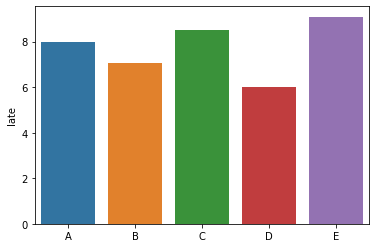

In [ ]:
debt_from_income = data.groupby('total_income_category').agg({'debt':['sum','count']})
debt_from_income['late'] = debt_from_income['debt']['sum'] / debt_from_income['debt']['count'] * 100
debt_from_income['on_time'] = 100 - debt_from_income['late']

sns.barplot(x=['A', 'B', 'C', 'D', 'E'], y=debt_from_income['late'], figsize=(10, 6))
debt_from_income.columns = ['Ко-во должников', 'Всего кредитополучателей', 'Доля должников, %', 'Доля выплативших вовремя, %']
display(debt_from_income) #UPD на отображение добавлен столбец 'count'

**Вывод:** зависимость есть, но она нелинейная, как можно было предполагать.

В первую очередь, численность групп имеет слишком большую разницу, чтобы на их примере вывести общую зависимость. Группы людей с крайне низким(`A`) и крайне высоким(`E`) доходами - малочисленны, что не позволяет сделать достоверный вывод. Группа с доходом выше среднего(`D`) показывает минимальный риск просрочки кредита, но степень доверия к этому выводу мала из-за небольшой численности этой группы, в сравнении с другими. Наибольший риск соответствует группе со средним доходор(`С`), она же и наиболее многочисленная.

В связи с вышесказанным, у меня есть предложения для повышения точности данных и достоверности выводов.
- Разбить группу `С` на несколько или уменьшить диапазон доходов, соответствующий этой групе, и одновременно увеличить диапозон доходов малочисленных групп `D` и `E`.
- Учитывать `типа дохода`, ведь при прочих равных, доход пенсионера стабильный и прогнозируемый, в отличие от наёмного работника.

### Влияние разных цели кредита на его срок возврат.

**Задача:** сгруппировать строки исходной таблицы по классифицированным целям, и подсчитать процентное соотношение кредитов выплаченных в срок и с опозданием.

**Результат:** сводная таблица `debt_from_purpose`, содержащая 3 столбца:
- `late` - доля кредитов выплаченная с опозданием (значения указаны в процентах)
- `on_time` - доля кредитов выплаченных во время (значения указаны в процентах)
- `purpose_category` - категории целей кредитов.

In [ ]:
debt_from_purpose = data.groupby('purpose_category').agg({'debt':['sum','count']})
debt_from_purpose['late'] = debt_from_purpose['debt']['sum'] / debt_from_purpose['debt']['count'] * 100
debt_from_purpose['on_time'] = 100 - debt_from_purpose['late']
debt_from_purpose = debt_from_purpose.sort_values(by='late')

display(debt_from_purpose[['late', 'on_time']])

,late,on_time
,,
purpose_category,,
операции с недвижимостью,7.255139,92.744861
проведение свадьбы,7.911803,92.088197
получение образования,9.252758,90.747242
операции с автомобилем,9.347978,90.652022


**Вывод:** зависимость есть!

Чаще всего проблемы с своевременным возвратом ссуды происходят если его целью является `получение образования` или `операции с автомобилем`, в обоих случаях идентичная вероятность. Ниже риск для кредитов предназначеных для `проведения свадеб` и совершению `операций с недвижимостью`. У последнее варианта самая низкая вероятность просрочки кредита.

### Возможные причины появления пропусков в исходных данных.

*Ответ:* В процессе предобработки устранялись пропуски в 2х столбцах датафрейма, которые содержали сведенья о *размере дохода* и *трудовом стаже*.

Для *1ого* значения имеет место быть стеснение указать размер своей зарплаты за определённый период. Среди граждан, обращающиеся за кредитом есть категория `безработный`, у которых, закономерно, может не быть дохода. Это так же может быть объяснением для пропусков в *трудовом стаже*.

Как ещё один вариант: *отсутствие подтверждающих документов* (справки о доходах, выписки со счётов, трудовая книжка). При принятии решения, сотруднику банка необходимо знать достоверность данных, предоставленных клиентом.

И в завершении, нельзя исключить фактор *случайной ошибки*, т.к. часть данных вносятся вручную человеком.

### Пояснение, почему пропуски заполнены медианным значением — лучшее решение для количественных переменных.

Величина з/п увеличивается **нелинейно**. Если её значения изобразить в зависимости от трудового стажа (к примеру), то она может иметь график *экспоненты*. Начало графика "лежит" вдоль минимальной з/п, а конец графика резко поднимается вверх, отражая высокую зарплату. При таком неравномерном распределении среднеарифметическое значение будет смещено сторону бОльших з/п, и не будет достоверно отображать действительность.

<a id='section_4'></a>
## Шаг 4: общий вывод.

В ходе исследования получилось проверить предположения о наличии зависимости между параметрами заёмщика и вероятностью возврата кредита в срок, и оценить на сколько эти параметры влияют на вероятность. Кратко:
- Дети: их отсутствие положительно сказывается на вероятности.
- Семейный статус: заёмщики, не бывавшие в браке, или, не зарегистрировавшие его, имеют наибольший риск не возврата кредита. Средний риск соответствует женатым клиентам, или находящимся замужем. Минимальный риск у группы людей, уже побывавших в браке.
- Уровень дохода: заёмщики группы D (доход ниже среднего) чаще возвращают кредиты в срок в сравнение с группой С (средний доход). Ещё реже возвращают кредит заёмщики из групп A и E, но этот вывод может оказаться недостоверным из-за их малой численности. Тоже самое касается группы B, которая показала минимальный риск не возврата кредита.
- Цель: Кредиты предназначенные для *проведения свадеб* и совершению *операций с недвижимостью* имеют наименьший риск.

На основе полученных зависимостей можно комплексно применять эти параметры для прогнозирования вероятности возврата кредита в срок для потенциального клиента.